# Airport

Creating a correlation analysis between the runway length of an airport and its corresponding elevation.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random

Getting the data from the file

In [3]:
airport_data = pd.read_csv('World_Airports.csv')
airport_data.head()

,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0


getting the column

In [62]:
airport_data.columns

Index(['X', 'Y', 'OBJECTID', 'id', 'airport_ident', 'type', 'name',
       'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent',
       'iso_country', 'iso_region', 'municipality', 'scheduled_service',
       'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link',
       'keywords', 'description', 'frequency_mhz', 'runway_length_ft',
       'runway_width_ft', 'runway_surface', 'runway_lighted', 'runway_closed'],
      dtype='object')

Dropping unrelated column

In [4]:
airport_data.drop(columns=['home_link', 'wikipedia_link'], inplace=True)

taking elevation of airport and airport name and make the data to meter. 

In [5]:
def convert_to_meter(elevation):
    return int(elevation * 0.3048)

In [6]:
airport_elevation = airport_data[['elevation_ft', 'name']].dropna().sort_values(by='elevation_ft', ascending=False)
airport_elevation['elevation_meter'] = airport_elevation['elevation_ft'].apply(convert_to_meter)
airport_elevation.set_index('name', inplace=True)
airport_elevation

,elevation_ft,elevation_meter
name,,
Mount Everest Base Camp Heliport,17372.0,5294
Kala Patthar Heliport,17347.0,5287
Daulat Beg Oldi Advanced Landing Ground,16200.0,4937
Aksai Chin Heliport,15988.0,4873
Nyima Heliport,14997.0,4571
...,...,...
Frink / Niland Marina Airport,-170.0,-51
Cliff Hatfield Memorial Airport,-182.0,-55
Furnace Creek Airport,-210.0,-64


Taking runway width from the runway width column in the airport data. Convert the data to meters from feet.
Taking only runway that have a width less than 60 meters and more than 9 meters.

In [7]:
airport_runway= airport_data[['runway_width_ft', 'name']].dropna().sort_values(by='runway_width_ft', ascending=False)
airport_runway['runway_width_meter'] = airport_runway['runway_width_ft'].apply(convert_to_meter)
airport_runway.set_index('name', inplace=True)
airport_runway = airport_runway[(airport_runway['runway_width_ft'] < 200) & (airport_runway['runway_width_ft'] >= 30)]
airport_runway

,runway_width_ft,runway_width_meter
name,,
Sungam ni Airport,199.0,60
Starbuck Municipal Airport,198.0,60
Akhtubinsk Air Base,198.0,60
Wells Municipal Airport,198.0,60
Krymsk Air Base,198.0,60
...,...,...
Rael Ranch Horse Pasture Airport,30.0,9
Bayless Airport,30.0,9
Lovelace Westside Hospital Heliport,30.0,9


Merging the data from the data for spesific elevation and the data for spesific runway width.

In [42]:
airport_runway_and_elevation = pd.merge(airport_runway, airport_elevation, on='name', how='inner').drop_duplicates()
airport_runway_and_elevation.sort_values(by='runway_width_meter', ascending=False)
airport_runway_and_elevation

,runway_width_ft,runway_width_meter,elevation_ft,elevation_meter
name,,,,
Sungam ni Airport,199.0,60,92.0,28
Starbuck Municipal Airport,198.0,60,1141.0,347
Akhtubinsk Air Base,198.0,60,50.0,15
Wells Municipal Airport,198.0,60,1119.0,341
Krymsk Air Base,198.0,60,66.0,20
...,...,...,...,...
Casas Adobes Airpark,30.0,9,5800.0,1767
The Bluff Heliport,30.0,9,62.0,18
Simons Airport,30.0,9,5525.0,1684


Make data that take maximum of elevation and minimum of elevation by their runway width

In [43]:
airport_runway_and_elevation.reset_index(inplace=True)
maximum_elevation= airport_runway_and_elevation.groupby('runway_width_meter')['elevation_meter'].idxmax()
minimum_elevation= airport_runway_and_elevation.groupby('runway_width_meter')['elevation_meter'].idxmin()
maximum_elevation = airport_runway_and_elevation.loc[maximum_elevation]
minimum_elevation = airport_runway_and_elevation.loc[minimum_elevation]


In [44]:
minimum_elevation

,name,runway_width_ft,runway_width_meter,elevation_ft,elevation_meter
23091,Odeco Cocodrie Heliport,30.0,9,3.0,0
22664,Seashell Seaplane Base,35.0,10,0.0,0
22486,Barra del Colorado Airport,39.0,11,3.0,0
22066,Las Peñas Airport,40.0,12,3.0,0
21351,Buccaneer Shore Facility Heliport,45.0,13,5.0,1
7993,Flying J Ranch Airport,48.0,14,3.0,0
20197,Cliff Hatfield Memorial Airport,50.0,15,-182.0,-55
19554,Humana Hospital New Orleans Heliport,55.0,16,-3.0,0
19012,Newcastle Aerodrome,59.0,17,1.0,0
18349,Ein Yahav Airfield,60.0,18,-164.0,-49


In [45]:
maximum_elevation

,name,runway_width_ft,runway_width_meter,elevation_ft,elevation_meter
19400,San Rafael Airport,30.0,9,14422.0,4395
22862,Tavaputs Ranch Airport,34.0,10,9200.0,2804
22495,Sinak Airport,39.0,11,7334.0,2235
21826,St Vincent General Hospital Heliport,40.0,12,10175.0,3101
21223,Eastside Airport,45.0,13,8030.0,2447
19395,San Rafael Airport,49.0,14,14422.0,4395
20001,Overlook Athletic Club Heliport,50.0,15,10085.0,3073
19642,Red River Heliport,55.0,16,8617.0,2626
19393,San Rafael Airport,59.0,17,14422.0,4395
18718,Snake River Health Services Inc Heliport,60.0,18,9300.0,2834


In [48]:
airport_merger = pd.merge(maximum_elevation, minimum_elevation, on='runway_width_meter', how='inner')
airport_merger

,name_x,runway_width_ft_x,runway_width_meter,elevation_ft_x,elevation_meter_x,name_y,runway_width_ft_y,elevation_ft_y,elevation_meter_y
0,San Rafael Airport,30.0,9,14422.0,4395,Odeco Cocodrie Heliport,30.0,3.0,0
1,Tavaputs Ranch Airport,34.0,10,9200.0,2804,Seashell Seaplane Base,35.0,0.0,0
2,Sinak Airport,39.0,11,7334.0,2235,Barra del Colorado Airport,39.0,3.0,0
3,St Vincent General Hospital Heliport,40.0,12,10175.0,3101,Las Peñas Airport,40.0,3.0,0
4,Eastside Airport,45.0,13,8030.0,2447,Buccaneer Shore Facility Heliport,45.0,5.0,1
5,San Rafael Airport,49.0,14,14422.0,4395,Flying J Ranch Airport,48.0,3.0,0
6,Overlook Athletic Club Heliport,50.0,15,10085.0,3073,Cliff Hatfield Memorial Airport,50.0,-182.0,-55
7,Red River Heliport,55.0,16,8617.0,2626,Humana Hospital New Orleans Heliport,55.0,-3.0,0
8,San Rafael Airport,59.0,17,14422.0,4395,Newcastle Aerodrome,59.0,1.0,0
9,Snake River Health Services Inc Heliport,60.0,18,9300.0,2834,Ein Yahav Airfield,60.0,-164.0,-49


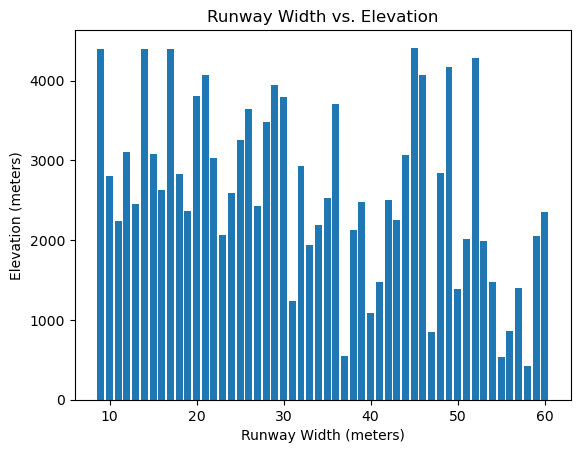

In [55]:
plt.bar(airport_merger['runway_width_meter'], airport_merger['elevation_meter_x'])
plt.title('Runway Width vs. Elevation')
plt.xlabel('Runway Width (meters)')
plt.ylabel('Elevation (meters)')
plt.show()

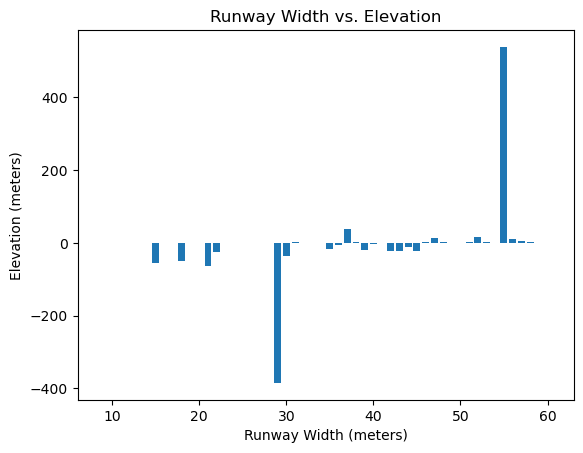

In [54]:
plt.bar(airport_merger['runway_width_meter'], airport_merger['elevation_meter_y'])
plt.title('Runway Width vs. Elevation')
plt.xlabel('Runway Width (meters)')
plt.ylabel('Elevation (meters)')
plt.show()

Based on this data we can see that the airport that have runway width have correlate with their elevation. The lower the airport elevation the wider the runway width. This is because the lower the airport elevation the more likely the airport is located in a valley or a flat area. This means that the airport is more likely to have a wider runway to accommodate more planes. The higher the airport elevation the more likely the airport is located in a mountainous area. This means that the airport is more likely to have a narrower runway to accommodate less planes.

In [84]:

row = 500
random_row = random.sample(range(len(airport_runway_and_elevation)), row)

random_airport = airport_runway_and_elevation.iloc[random_row]
random_airport = pd.DataFrame(random_airport).sort_values(by='runway_meter', ascending=False)
random_airport

,runway_width_ft,runway_meter,elevation_ft,elevation_meter
name,,,,
Starbuck Municipal Airport,198.0,60,1141.0,347
Lipetsk Air Base,197.0,60,636.0,193
Iferouane Airport,196.0,59,2162.0,658
Kroelinger Airport,190.0,57,93.0,28
Berwick Airport,185.0,56,1400.0,426
...,...,...,...,...
Iberlin Strip,30.0,9,4331.0,1320
Marine Consultants Inc Heliport,30.0,9,50.0,15
Skywagon Farm Airport,30.0,9,4770.0,1453


In [85]:
max_runway = max(random_airport['runway_meter'])
max_elevation = max(random_airport['elevation_meter'])

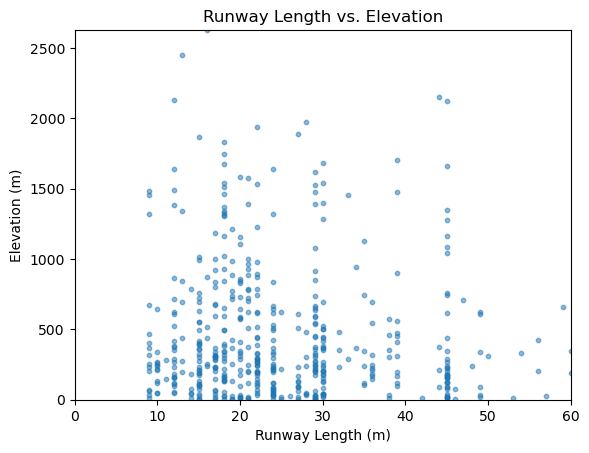

<Figure size 2000x1000 with 0 Axes>

In [86]:
plt.scatter(x=random_airport['runway_meter'], y=random_airport['elevation_meter'], alpha=0.5, s=10)
plt.xlim(0, max_runway)
plt.ylim(0, max_elevation)
plt.xlabel('Runway Length (m)')
plt.ylabel('Elevation (m)')
plt.title('Runway Length vs. Elevation')
plt.figure(figsize=(20,10))
plt.show()